In [1]:
from scipy.io import loadmat as lm
import statsmodels.formula.api as sf
from pandas import DataFrame as df
from pandas import read_csv
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
% matplotlib inline

In [34]:
subs = ['Sub01', 'Sub02', 'Sub04', 'Sub05', 'Sub06', 'Sub08', 'Sub10', 'Sub11', 'Sub13']
nSub = len(subs)

In [35]:
# Values of x as found by fitting the interaction model
x_interact = np.array([[ 0.09,  0.09,  0.17,  0.21,  0.11,  0.27,  0.19,  0.17,  0.19],
 [ 0.07,  0.03,  0.23,  0.23,  0.11,  0.31,  0.17,  0.13,  0.11],
 [ 0.11,  0.09,  0.15,  0.15,  0.13,  0.09,  0.15,  0.09,  0.25],
 [ 0.05,  0.09,  0.09,  0.11,  0.09,  0.09,  0.19,  0.11,  0.13],
 [ 0.09,  0.09,  0.07,  0.33,  0.25,  0.19,  0.09,  0.19,  0.19],
 [ 0.13,  0.03,  0.19,  0.11,  0.21,  0.39,  0.17,  0.19,  0.09],
 [ 0.11,  0.15,  0.13,  0.19,  0.43,  0.43,  0.37,  0.45,  0.23],
 [ 0.31,  0.55,  0.97,  0.63,  0.93,  0.63,  0.81,  0.83,  0.21],
 [ 0.29,  0.55,  0.97,  0.75,  1.07,  0.73,  1.05,  1.03,  0.33],
 [ 0.61,  0.47,  0.91,  0.75,  1.03,  0.75,  1.03,  0.97,  0.21],
 [ 0.05,  0.07,  0.11,  0.21,  0.11,  0.15,  0.15,  0.21,  0.17],
 [ 0.45,  0.21,  0.37,  0.55,  0.75,  0.39,  0.45,  0.39,  0.25],
 [ 0.85,  0.85,  1.63,  1.41,  1.59,  0.83,  1.47,  1.51,  0.31],
 [ 0.95,  0.87,  2.09,  1.33,  1.49,  0.91,  1.61,  1.65,  0.25],
 [ 1.13,  0.73,  2.01,  1.69,  1.75,  1.07,  1.63,  1.73,  0.35],
 [ 0.09,  0.05,  0.07,  0.17,  0.17,  0.19,  0.15,  0.11,  0.27],
 [ 0.41,  0.09,  0.41,  0.59,  1.21,  0.65,  0.73,  0.53,  1.05],
 [ 2.75,  3.19,  2.65,  1.89,  2.33,  1.57,  1.73,  1.43,  1.87],
 [ 2.85,  5.33,  3.25,  2.33,  2.39,  1.97,  2.35,  1.97,  2.11],
 [ 2.89,  7.15,  3.27,  2.31,  2.79,  1.95,  2.51,  1.89,  2.13]])

In [36]:
# Values of x as found by fitting the interaction model without the D0Call conditions
x_interact_noD0Call = np.array([[ 0.17,  0.15,  0.83,  0.43,  0.21,  0.57,  0.31,  0.23,  0.23],
 [ 0.29,  0.35,  0.49,  0.27,  0.25,  0.17,  0.27,  0.17,  0.47],
 [ 0.13,  0.35,  0.33,  0.21,  0.19,  0.17,  0.35,  0.19,  0.25],
 [ 0.21,  0.37,  0.25,  0.59,  0.43,  0.35,  0.17,  0.37,  0.37],
 [ 0.27,  0.65,  0.49,  0.35,  0.83,  0.83,  0.73,  0.81,  0.45],
 [ 0.79,  2.87,  2.09,  1.77,  2.75,  1.71,  2.61,  2.69,  0.37],
 [ 0.75,  2.87,  1.97,  2.19,  3.15,  2.19,  3.21,  3.17,  0.61],
 [ 1.51,  2.35,  1.89,  2.13,  2.75,  2.13,  3.25,  2.83,  0.49],
 [ 1.11,  1.03,  1.65,  1.27,  2.31,  0.67,  1.15,  0.81,  0.49],
 [ 2.03,  3.79,  3.37,  4.21,  4.57,  2.73,  4.35,  4.45,  0.61],
 [ 2.27,  3.87,  4.07,  3.87,  4.23,  2.79,  4.69,  4.81,  0.55],
 [ 2.67,  3.61,  3.85,  4.93,  5.07,  3.41,  4.77,  4.97,  0.81],
 [ 1.05,  0.93,  2.23,  2.17,  3.65,  1.07,  2.29,  0.85,  2.85],
 [ 6.57,  5.99,  5.19,  5.43,  6.57,  4.59,  4.97,  4.11,  5.31],
 [ 6.83,  6.71,  6.33,  6.61,  6.73,  5.61,  6.61,  5.61,  5.95],
 [ 6.91,  6.97,  6.37,  6.55,  7.87,  5.61,  7.05,  5.45,  6.07]])

In [37]:
# Values of x as found by fitting the interaction model without the C0Dall conditions
x_interact_noC0Dall = np.array([[ 0.27,  0.13,  0.55,  0.17,  0.35,  0.73,  0.29,  0.29,  0.17],
 [ 0.23,  0.55,  0.41,  0.31,  0.71,  0.71,  0.63,  0.69,  0.37],
 [ 0.67,  2.47,  1.79,  1.51,  2.35,  1.45,  2.25,  2.31,  0.33],
 [ 0.63,  2.47,  1.69,  1.87,  2.69,  1.87,  2.75,  2.73,  0.53],
 [ 1.29,  2.01,  1.61,  1.83,  2.37,  1.83,  2.79,  2.43,  0.41],
 [ 0.13,  0.31,  0.33,  0.37,  0.19,  0.25,  0.31,  0.37,  0.29],
 [ 0.95,  0.87,  1.43,  1.09,  1.97,  0.59,  0.97,  0.69,  0.43],
 [ 1.73,  3.25,  2.89,  3.61,  3.91,  2.33,  3.73,  3.81,  0.53],
 [ 1.95,  3.31,  3.49,  3.31,  3.63,  2.39,  4.03,  4.13,  0.47],
 [ 2.29,  3.09,  3.31,  4.23,  4.35,  2.93,  4.09,  4.27,  0.69],
 [ 0.21,  0.27,  0.17,  0.37,  0.25,  0.31,  0.25,  0.19,  0.37],
 [ 0.89,  0.81,  1.91,  1.87,  3.13,  0.91,  1.97,  0.73,  2.45],
 [ 5.63,  5.13,  4.45,  4.65,  5.63,  3.93,  4.25,  3.53,  4.55],
 [ 5.85,  5.75,  5.41,  5.65,  5.77,  4.81,  5.67,  4.81,  5.11],
 [ 5.93,  5.97,  5.47,  5.61,  6.75,  4.81,  6.05,  4.67,  5.19]])

In [38]:
# Values of x as found by fitting the interaction model without the D0Call and C0Dall conditions
x_interact_noD0CallandC0Dall = np.array([[ 0.23,  0.55,  0.41,  0.31,  0.71,  0.71,  0.63,  0.69,  0.37],
 [ 0.67,  2.47,  1.79,  1.51,  2.35,  1.45,  2.25,  2.31,  0.33],
 [ 0.63,  2.47,  1.69,  1.87,  2.69,  1.87,  2.75,  2.73,  0.53],
 [ 1.29,  2.01,  1.61,  1.83,  2.37,  1.83,  2.79,  2.43,  0.41],
 [ 0.95,  0.87,  1.43,  1.09,  1.97,  0.59,  0.97,  0.69,  0.43],
 [ 1.73,  3.25,  2.89,  3.61,  3.91,  2.33,  3.73,  3.81,  0.53],
 [ 1.95,  3.31,  3.49,  3.31,  3.63,  2.39,  4.03,  4.13,  0.47],
 [ 2.29,  3.09,  3.31,  4.23,  4.35,  2.93,  4.09,  4.27,  0.69],
 [ 0.89,  0.81,  1.91,  1.87,  3.13,  0.91,  1.97,  0.73,  2.45],
 [ 5.63,  5.13,  4.45,  4.65,  5.63,  3.93,  4.25,  3.53,  4.55],
 [ 5.85,  5.75,  5.41,  5.65,  5.77,  4.81,  5.67,  4.81,  5.11],
 [ 5.93,  5.97,  5.47,  5.61,  6.75,  4.81,  6.05,  4.67,  5.19]])

In [39]:
# For all coherences and distances
# Values of x as found by 
# a) Fitting parametric coherences at highest distance, and 
x_coh = np.array([[ 0.03,  0.11,  0.19,  0.05,  0.03,  0.23,  0.13,  0.25,  0.05],
 [ 0.21,  0.73,  1.85,  0.09,  0.07,  1.15,  2.77,  2.29,  0.07],
 [ 0.45,  1.13,  4.03,  1.85,  0.95,  2.95,  4.11,  4.27,  0.09],
 [ 2.77,  3.11,  7.47,  5.27,  2.51,  4.83,  6.07,  4.69,  5.53]])

# b) Fitting parametric distances at highest coherence
x_dist = np.array([[ 0.23,  0.33,  0.07,  0.07,  0.03,  0.25,  0.11,  0.15,  0.15],
 [ 1.85,  1.77,  0.89,  0.53,  0.45,  0.67,  0.93,  0.55,  0.43],
 [ 4.61,  4.21,  2.23,  1.51,  0.81,  3.95,  2.13,  3.49,  2.29],
 [ 4.79,  4.69,  2.73,  1.97,  0.83,  4.83,  2.85,  4.83,  2.57],
 [ 4.85,  4.89,  2.75,  1.93,  0.97,  4.83,  3.03,  4.69,  2.61]])

# Values of k as found by 
# a) Fitting parametric coherences at each distance, and 
k_coh = np.array([[ 0.09,  0.29,  0.95,  1.4 ,  1.96],
       [ 0.09,  0.27,  1.01,  1.2 ,  1.  ],
       [ 0.02,  0.1 ,  0.26,  0.31,  0.33],
       [ 0.06,  0.12,  1.5 ,  0.75,  1.5 ],
       [ 0.16,  0.53,  1.46,  0.96,  2.45],
       [ 0.06,  0.12,  0.31,  0.31,  0.36],
       [ 0.02,  0.12,  0.31,  0.31,  0.39],
       [ 0.04,  0.07,  0.31,  0.4 ,  0.42],
       [ 0.06,  0.12,  0.4 ,  0.52,  1.4 ]])

# b) Fitting parametric distances at each coherence
k_dist = np.array([[ 0.03,  0.09,  0.18,  0.43],
       [ 0.04,  0.19,  0.31,  0.46],
       [ 0.06,  0.28,  0.53,  0.71],
       [ 0.09,  0.35,  0.77,  1.42],
       [ 0.16,  0.94,  1.77,  2.14],
       [ 0.02,  0.13,  0.21,  0.42],
       [ 0.06,  0.35,  0.7 ,  0.78],
       [ 0.02,  0.18,  0.41,  0.42],
       [ 0.06,  0.09,  0.09,  0.7 ]])

In [40]:
# For all coherences and distances except D0Call
# Values of x as found by 
# a) Fitting parametric coherences at highest distance, and 
x_coh_noD0Call = np.array([[ 0.056,  0.246,  0.136,  0.071,  0.091,  0.346,  0.096,  0.366,  0.036],
 [ 0.381,  1.621,  1.371,  0.136,  0.216,  1.666,  2.046,  3.316,  0.046],
 [ 0.806,  2.501,  2.981,  2.766,  2.836,  4.266,  3.036,  6.186,  0.066],
 [ 4.971,  6.881,  5.521,  7.891,  7.491,  6.976,  4.481,  6.776,  4.151]])

# b) Fitting parametric distances at highest coherence
x_dist_noD0Call = np.array([[ 1.8,    1.73,   0.89,   0.3,    1.035,  0.66,   0.915,  0.54,   0.425],
 [ 4.5,    4.105,  2.205,  0.865,  1.875,  3.86,   2.115,  3.415,  2.26 ],
 [ 4.67,   4.59,   2.695,  1.125,  1.925,  4.715,  2.815,  4.725,  2.54 ],
 [ 4.74,   4.775,  2.72,   1.105,  2.25,   4.71,   3.005,  4.575,  2.585]])

# Values of k as found by 
# a) Fitting parametric coherences at each distance, and 
k_coh_noD0Call = np.array([[ 0.136 ,  0.502 ,  0.8212,  1.0463],
       [ 0.067 ,  0.477 ,  0.5397,  0.457 ],
       [ 0.1656,  0.3425,  0.424 ,  0.424 ],
       [ 0.093 ,  1.005 ,  0.5065,  1.005 ],
       [ 0.15  ,  0.494 ,  0.376 ,  0.824 ],
       [ 0.093 ,  0.2178,  0.2178,  0.287 ],
       [ 0.14  ,  0.424 ,  0.424 ,  0.537 ],
       [ 0.049 ,  0.218 ,  0.28  ,  0.287 ],
       [ 0.178 ,  0.546 ,  0.767 ,  1.021 ]])

# b) Fitting parametric distances at each coherence
k_dist_noD0Call = np.array([[ 0.01 ,  0.01 ,  0.176,  0.508],
       [ 0.031,  0.206,  0.306,  0.472],
       [ 0.056,  0.28 ,  0.58 ,  0.746],
       [ 0.117,  0.601,  1.31 ,  2.505],
       [ 0.057,  0.369,  0.727,  0.894],
       [ 0.022,  0.14 ,  0.2  ,  0.425],
       [ 0.044,  0.318,  0.659,  0.708],
       [ 0.026,  0.197,  0.435,  0.413],
       [ 0.068,  0.09 ,  0.106,  0.667]])

In [41]:
# For all coherences and distances except C0Dall
# Values of x as found by 
# a) Fitting parametric coherences at highest distance, and 
x_coh_noC0Dall = np.array([[ 0.24,   1.645,  1.395,  0.07,   0.145,  0.865,  2.08,   1.72,   0.02 ],
 [ 0.505,  2.54,   3.03,   1.385,  1.9,    2.215,  3.08,   3.21,   0.03 ],
 [ 3.12,   6.99,   5.605,  3.955,  5.02,   3.62,   4.555,  3.515,  1.845]])

# b) Fitting parametric distances at highest coherence
x_dist_noC0Dall = np.array([[ 0.176,  0.241,  0.106,  0.136,  0.106,  0.181,  0.101,  0.116,  0.226],
 [ 1.381,  1.331,  1.346,  1.051,  1.561,  0.506,  0.926,  0.416,  0.641],
 [ 3.456,  3.156,  3.341,  3.026,  2.831,  2.966,  2.136,  2.621,  3.426],
 [ 3.591,  3.526,  4.081,  3.936,  2.901,  3.626,  2.846,  3.631,  3.846],
 [ 3.646,  3.671,  4.116,  3.871,  3.396,  3.621,  3.036,  3.516,  3.916]])

# Values of k as found by 
# a) Fitting parametric coherences at each distance, and 
k_coh_noC0Dall = np.array([[ 0.0532,  0.209 ,  0.899 ,  1.3062,  1.778 ],
       [ 0.031 ,  0.118 ,  0.476 ,  0.526 ,  0.4325],
       [ 0.0215,  0.128 ,  0.348 ,  0.451 ,  0.476 ],
       [ 0.084 ,  0.1566,  2.    ,  1.    ,  2.251 ],
       [ 0.032 ,  0.2091,  0.7923,  0.556 ,  1.2715],
       [ 0.0425,  0.1566,  0.4175,  0.4175,  0.5216],
       [ 0.032 ,  0.1566,  0.4175,  0.4175,  0.5216],
       [ 0.032 ,  0.1055,  0.418 ,  0.6358,  0.556 ],
       [ 0.1672,  0.4172,  1.111 ,  1.806 ,  3.001 ]])

# b) Fitting parametric distances at each coherence
k_dist_noC0Dall = np.array([[ 0.098 ,  0.216 ,  0.616 ],
       [ 0.251 ,  0.396 ,  0.576 ],
       [ 0.196 ,  0.3715,  0.498 ],
       [ 0.1415,  0.397 ,  0.7392],
       [ 0.2508,  0.4585,  0.6385],
       [ 0.196 ,  0.251 ,  0.5565],
       [ 0.334 ,  0.626 ,  0.735 ],
       [ 0.2508,  0.5628,  0.5762],
       [ 0.053 ,  0.0599,  0.417 ]])

In [42]:
# For all coherences and distances except D0Call and C0Dall
# Values of x as found by 
# a) Fitting parametric coherences at highest distance, and 
x_coh_noD0CallandC0Dall = np.array([[ 0.426,  0.731,  1.856,  0.111,  0.096,  1.151,  2.771,  2.291,  0.081],
 [ 0.896,  1.131,  4.036,  2.216,  1.266,  2.951,  4.106,  4.276,  0.116],
 [ 5.541,  3.111,  7.471,  6.326,  3.351,  4.826,  6.066,  4.686,  7.376]])

# b) Fitting parametric distances at highest coherence
x_dist_noD0CallandC0Dall = np.array([[ 1.38,   1.33,   1.345,  0.525,  1.56,   0.505,  1.39,   0.415,  0.64 ],
 [ 3.46,   3.155,  3.34,   1.515,  2.83,   2.97,   3.205,  2.625,  3.425],
 [ 3.59,   3.525,  4.085,  1.97,   2.905,  3.625,  4.265,  3.63,   3.845],
 [ 3.645,  3.67,   4.12,   1.935,  3.395,  3.62,   4.555,  3.515,  3.915]])

# Values of k as found by 
# a) Fitting parametric coherences at each distance, and 
k_coh_noD0CallandC0Dall = np.array([[ 0.1345,  0.4582,  0.732 ,  0.941 ],
       [ 0.236 ,  0.9835,  1.2617,  0.954 ],
       [ 0.0962,  0.262 ,  0.314 ,  0.3575],
       [ 0.1176,  1.375 ,  0.7208,  1.3865],
       [ 0.3137,  1.25  ,  0.834 ,  1.751 ],
       [ 0.1176,  0.314 ,  0.314 ,  0.392 ],
       [ 0.1176,  0.314 ,  0.314 ,  0.392 ],
       [ 0.0635,  0.3137,  0.5015,  0.418 ],
       [ 0.098 ,  0.294 ,  0.4158,  1.255 ]])

# b) Fitting parametric distances at each coherence
k_dist_noD0CallandC0Dall = np.array([[ 0.089 ,  0.2415,  0.567 ],
       [ 0.2705,  0.411 ,  0.6087],
       [ 0.1835,  0.3558,  0.485 ],
       [ 0.293 ,  0.792 ,  1.3555],
       [ 0.251 ,  0.496 ,  0.583 ],
       [ 0.1835,  0.251 ,  0.563 ],
       [ 0.22  ,  0.4165,  0.458 ],
       [ 0.2382,  0.563 ,  0.563 ],
       [ 0.048 ,  0.079 ,  0.423 ]])

In [43]:
# Regress kx with distance and coherence in the models where 
# 1) x is fit for each distance and k for each coherence. and 
# 2) x is fit for each coherence and k for each distance

nC = 4
nD = 5

dreg = np.ones((nC*nD,nSub))
creg = np.ones((nC*nD,nSub))

params_interact = np.zeros((3,nSub))
pvals_interact = np.zeros((3,nSub))
gof_interact  = np.zeros((2,nSub))

params_coh = np.zeros((3,nSub))
pvals_coh = np.zeros((3,nSub))
gof_coh  = np.zeros((2,nSub))

params_dist = np.zeros((3,nSub))
pvals_dist = np.zeros((3,nSub))
gof_dist  = np.zeros((2,nSub))

for si in range(nSub):
    cdmat = lm('..\\Data\\Behavior\\DirCoh' + subs[si] + '.mat')
    # In the DirCoh matrix, the first column is distance and second is coherence
    dist = np.unique(np.abs(cdmat['DirCoh'][:,0]))
    coh = np.unique(cdmat['DirCoh'][:,1])
    # In the x arrays, distance goes through all values before coherence changes
    temp = np.ones((nC, nD)) * dist[0:5]/dist[4]
    dreg[:,si] = temp.flatten()
    temp = np.ones((nD, nC)) * coh
    creg[:,si] = temp.T.flatten()
    
    kx_coh = k_coh[si,:] * np.ones((nC, nD)) * np.reshape(x_coh[:,si], (nC,1))
    kx_dist = k_dist[si,:] * np.ones((nD, nC)) * np.reshape(x_dist[:,si], (nD,1))
    kx_dist = kx_dist.T
    
    # Regress x obtained from fitting coherence-distance combinations
    # against coherence and distance measures
    data = df({'coh' : creg[:,si],
               'dist' : dreg[:,si],
               'x' : x_interact[:,si]})
    
    est = sf.ols(formula = 'x ~ coh * dist', data = data).fit()
    
    # Save the values of betas and their p-values
    params_interact[0,si] = est.params['coh']
    params_interact[1,si] = est.params['dist']
    params_interact[2,si] = est.params['coh:dist']
    
    pvals_interact[0,si] = est.pvalues['coh']
    pvals_interact[1,si] = est.pvalues['dist']
    pvals_interact[2,si] = est.pvalues['coh:dist']
    
    gof_interact[0,si] = est.rsquared
    gof_interact[1,si] = est.fvalue
    
    # Regress kx obtained from fitting parametric coherence at high distances 
    # against coherence and distance measures
    data = df({'coh' : creg[:,si],
               'dist' : dreg[:,si],
               'x' : kx_coh.flatten()})
    
    est = sf.ols(formula = 'x ~ coh * dist', data = data).fit()
    
    # Save the values of betas and their p-values
    params_coh[0,si] = est.params['coh']
    params_coh[1,si] = est.params['dist']
    params_coh[2,si] = est.params['coh:dist']
    
    pvals_coh[0,si] = est.pvalues['coh']
    pvals_coh[1,si] = est.pvalues['dist']
    pvals_coh[2,si] = est.pvalues['coh:dist']
    
    gof_coh[0,si] = est.rsquared
    gof_coh[1,si] = est.fvalue
    
    # Regress kx obtained from fitting parametric distance at high coherences 
    # against coherence and distance measures
    data = df({'coh' : creg[:,si],
               'dist' : dreg[:,si],
               'x' : kx_dist.flatten()})
    
    est = sf.ols(formula = 'x ~ coh * dist', data = data).fit()
    
    # Save the values of betas and their p-values
    params_dist[0,si] = est.params['coh']
    params_dist[1,si] = est.params['dist']
    params_dist[2,si] = est.params['coh:dist']
    
    pvals_dist[0,si] = est.pvalues['coh']
    pvals_dist[1,si] = est.pvalues['dist']
    pvals_dist[2,si] = est.pvalues['coh:dist']
    
    gof_dist[0,si] = est.rsquared
    gof_dist[1,si] = est.fvalue

In [44]:
# Print parameter values and significance values for the model fitting CD combinations
np.set_printoptions(precision = 3, suppress = True)
print('Interaction model, all CD')
print('Parameter values:')
print('   Coh    Dist   Interaction')
print(params_interact.T)
print('')
print('Significance values:')
print('   Coh    Dist   Interaction')
print(pvals_interact.T)
print('')

# Print parameter values and significance values for the model fitting parametric coherences for each distance
print('Coherence model, all CD')
print('Parameter values:')
print('   Coh    Dist   Interaction')
print(params_coh.T)
print('')
print('Significance values:')
print('   Coh    Dist   Interaction')
print(pvals_coh.T)
print('')

# Print parameter values and significance values for the model fitting parametric distances for each coherence
print('Distance model, all CD')
print('Parameter values:')
print('   Coh    Dist   Interaction')
print(params_dist.T)
print('')
print('Significance values:')
print('   Coh    Dist   Interaction')
print(pvals_dist.T)

Interaction model, all CD
Parameter values:
   Coh    Dist   Interaction
[[ 0.242  0.285  2.616]
 [-0.653 -0.543  7.703]
 [ 0.014  0.492  3.293]
 [ 0.169  0.436  2.001]
 [ 0.43   0.501  1.987]
 [ 0.056  0.1    1.811]
 [ 0.094  0.499  2.04 ]
 [ 0.032  0.57   1.505]
 [ 0.423 -0.264  2.004]]

Significance values:
   Coh    Dist   Interaction
[[ 0.434  0.241  0.   ]
 [ 0.068  0.068  0.   ]
 [ 0.975  0.206  0.   ]
 [ 0.588  0.116  0.001]
 [ 0.266  0.124  0.004]
 [ 0.763  0.52   0.   ]
 [ 0.778  0.085  0.001]
 [ 0.935  0.09   0.025]
 [ 0.123  0.266  0.   ]]

Coherence model, all CD
Parameter values:
   Coh    Dist   Interaction
[[ 0.289  0.17   4.442]
 [ 0.534  0.271  3.069]
 [ 0.355  0.346  2.111]
 [ 0.705 -0.028  7.34 ]
 [ 0.559  0.001  4.533]
 [ 0.359  0.236  1.258]
 [ 0.282  0.553  1.669]
 [ 0.139  0.704  1.431]
 [-0.584 -1.163  7.191]]

Significance values:
   Coh    Dist   Interaction
[[ 0.142  0.259  0.   ]
 [ 0.156  0.376  0.   ]
 [ 0.166  0.118  0.   ]
 [ 0.544  0.977  0.001]
 [ 0.4

In [45]:
# Regress kx with distance and coherence in the models where 
# 1) x is fit for each distance and k for each coherence. and 
# 2) x is fit for each coherence and k for each distance
# The D0Call conditions are excluded

nC = 4
nD = 4

dreg = np.ones((nC*nD,nSub))
creg = np.ones((nC*nD,nSub))

params_interact = np.zeros((3,nSub))
pvals_interact = np.zeros((3,nSub))
gof_interact  = np.zeros((2,nSub))

params_coh = np.zeros((3,nSub))
pvals_coh = np.zeros((3,nSub))
gof_coh  = np.zeros((2,nSub))

params_dist = np.zeros((3,nSub))
pvals_dist = np.zeros((3,nSub))
gof_dist  = np.zeros((2,nSub))

for si in range(nSub):
    cdmat = lm('..\\Data\\Behavior\\DirCoh' + subs[si] + '.mat')
    # In the DirCoh matrix, the first column is distance and second is coherence
    dist = np.unique(np.abs(cdmat['DirCoh'][:,0]))
    coh = np.unique(cdmat['DirCoh'][:,1])
    # In the x arrays, distance goes through all values before coherence changes
    temp = np.ones((nC, nD)) * dist[1:5]/dist[4]
    dreg[:,si] = temp.flatten()
    temp = np.ones((nD, nC)) * coh
    creg[:,si] = temp.T.flatten()
    
    kx_coh = k_coh_noD0Call[si,:] * np.ones((nC, nD)) * np.reshape(x_coh_noD0Call[:,si], (nC,1))
    kx_dist = k_dist_noD0Call[si,:] * np.ones((nD, nC)) * np.reshape(x_dist_noD0Call[:,si], (nD,1))
    kx_dist = kx_dist.T
    
    # Regress x obtained from fitting coherence-distance combinations
    # against coherence and distance measures
    data = df({'coh' : creg[:,si],
               'dist' : dreg[:,si],
               'x' : x_interact_noD0Call[:,si]})
    
    est = sf.ols(formula = 'x ~ coh * dist', data = data).fit()
    
    # Save the values of betas and their p-values
    params_interact[0,si] = est.params['coh']
    params_interact[1,si] = est.params['dist']
    params_interact[2,si] = est.params['coh:dist']
    
    pvals_interact[0,si] = est.pvalues['coh']
    pvals_interact[1,si] = est.pvalues['dist']
    pvals_interact[2,si] = est.pvalues['coh:dist']
    
    gof_interact[0,si] = est.rsquared
    gof_interact[1,si] = est.fvalue
    
    # Regress kx obtained from fitting parametric coherence at high distances 
    # against coherence and distance measures
    data = df({'coh' : creg[:,si],
               'dist' : dreg[:,si],
               'x' : kx_coh.flatten()})
    
    est = sf.ols(formula = 'x ~ coh * dist', data = data).fit()
    
    # Save the values of betas and their p-values
    params_coh[0,si] = est.params['coh']
    params_coh[1,si] = est.params['dist']
    params_coh[2,si] = est.params['coh:dist']
    
    pvals_coh[0,si] = est.pvalues['coh']
    pvals_coh[1,si] = est.pvalues['dist']
    pvals_coh[2,si] = est.pvalues['coh:dist']
    
    gof_coh[0,si] = est.rsquared
    gof_coh[1,si] = est.fvalue
    
    # Regress kx obtained from fitting parametric distance at high coherences 
    # against coherence and distance measures
    data = df({'coh' : creg[:,si],
               'dist' : dreg[:,si],
               'x' : kx_dist.flatten()})
    
    est = sf.ols(formula = 'x ~ coh * dist', data = data).fit()
    
    # Save the values of betas and their p-values
    params_dist[0,si] = est.params['coh']
    params_dist[1,si] = est.params['dist']
    params_dist[2,si] = est.params['coh:dist']
    
    pvals_dist[0,si] = est.pvalues['coh']
    pvals_dist[1,si] = est.pvalues['dist']
    pvals_dist[2,si] = est.pvalues['coh:dist']
    
    gof_dist[0,si] = est.rsquared
    gof_dist[1,si] = est.fvalue

In [46]:
# Print parameter values and significance values for the model fitting CD combinations
np.set_printoptions(precision = 3, suppress = True)
print('Interaction model, all CD except D0Call')
print('Parameter values:')
print('   Coh    Dist   Interaction')
print(params_interact.T)
print('')
print('Significance values:')
print('   Coh    Dist   Interaction')
print(pvals_interact.T)
print('')

# Print parameter values and significance values for the model fitting parametric coherences for each distance
print('Coherence model, all CD except D0Call')
print('Parameter values:')
print('   Coh    Dist   Interaction')
print(params_coh.T)
print('')
print('Significance values:')
print('   Coh    Dist   Interaction')
print(pvals_coh.T)
print('')

# Print parameter values and significance values for the model fitting parametric distances for each coherence
print('Distance model, all CD except D0Call')
print('Parameter values:')
print('   Coh    Dist   Interaction')
print(params_dist.T)
print('')
print('Significance values:')
print('   Coh    Dist   Interaction')
print(pvals_dist.T)

Interaction model, all CD except D0Call
Parameter values:
   Coh    Dist   Interaction
[[ 1.201  0.569  5.496]
 [ 0.29   0.847  6.248]
 [ 1.266  0.499  4.733]
 [ 1.75   1.386  4.221]
 [ 2.9    1.214  3.589]
 [ 0.31   0.664  5.015]
 [ 1.204  1.64   4.534]
 [ 0.006  1.735  4.401]
 [ 2.437 -0.577  4.299]]

Significance values:
   Coh    Dist   Interaction
[[ 0.297  0.473  0.004]
 [ 0.86   0.491  0.018]
 [ 0.334  0.613  0.025]
 [ 0.273  0.258  0.085]
 [ 0.116  0.357  0.166]
 [ 0.782  0.43   0.007]
 [ 0.506  0.23   0.095]
 [ 0.998  0.271  0.154]
 [ 0.073  0.567  0.034]]

Coherence model, all CD except D0Call
Parameter values:
   Coh    Dist   Interaction
[[ 0.2    0.174  4.49 ]
 [ 0.577  0.269  3.026]
 [ 0.76   0.251  1.533]
 [ 1.232 -0.028  6.706]
 [ 0.525  0.003  4.752]
 [ 0.473  0.236  1.246]
 [ 0.423  0.5    1.509]
 [ 0.155  0.698  1.41 ]
 [-0.138 -0.774  4.767]]

Significance values:
   Coh    Dist   Interaction
[[ 0.34   0.239  0.   ]
 [ 0.419  0.609  0.01 ]
 [ 0.062  0.392  0.016]
 [

In [47]:
# Regress kx with distance and coherence in the models where 
# 1) x is fit for each distance and k for each coherence. and 
# 2) x is fit for each coherence and k for each distance
# The C0Dall conditions are excluded

nC = 3
nD = 5

dreg = np.ones((nC*nD,nSub))
creg = np.ones((nC*nD,nSub))

params_interact = np.zeros((3,nSub))
pvals_interact = np.zeros((3,nSub))
gof_interact  = np.zeros((2,nSub))

params_coh = np.zeros((3,nSub))
pvals_coh = np.zeros((3,nSub))
gof_coh  = np.zeros((2,nSub))

params_dist = np.zeros((3,nSub))
pvals_dist = np.zeros((3,nSub))
gof_dist  = np.zeros((2,nSub))

for si in range(nSub):
    cdmat = lm('..\\Data\\Behavior\\DirCoh' + subs[si] + '.mat')
    # In the DirCoh matrix, the first column is distance and second is coherence
    dist = np.unique(np.abs(cdmat['DirCoh'][:,0]))
    coh = np.unique(cdmat['DirCoh'][:,1])[1:]
    # In the x arrays, distance goes through all values before coherence changes
    temp = np.ones((nC, nD)) * dist[0:5]/dist[4]
    dreg[:,si] = temp.flatten()
    temp = np.ones((nD, nC)) * coh
    creg[:,si] = temp.T.flatten()
    
    kx_coh = k_coh_noC0Dall[si,:] * np.ones((nC, nD)) * np.reshape(x_coh_noC0Dall[:,si], (nC,1))
    kx_dist = k_dist_noC0Dall[si,:] * np.ones((nD, nC)) * np.reshape(x_dist_noC0Dall[:,si], (nD,1))
    kx_dist = kx_dist.T
    
    # Regress x obtained from fitting coherence-distance combinations
    # against coherence and distance measures
    data = df({'coh' : creg[:,si],
               'dist' : dreg[:,si],
               'x' : x_interact_noC0Dall[:,si]})
    
    est = sf.ols(formula = 'x ~ coh * dist', data = data).fit()
    
    # Save the values of betas and their p-values
    params_interact[0,si] = est.params['coh']
    params_interact[1,si] = est.params['dist']
    params_interact[2,si] = est.params['coh:dist']
    
    pvals_interact[0,si] = est.pvalues['coh']
    pvals_interact[1,si] = est.pvalues['dist']
    pvals_interact[2,si] = est.pvalues['coh:dist']
    
    gof_interact[0,si] = est.rsquared
    gof_interact[1,si] = est.fvalue
    
    # Regress kx obtained from fitting parametric coherence at high distances 
    # against coherence and distance measures
    data = df({'coh' : creg[:,si],
               'dist' : dreg[:,si],
               'x' : kx_coh.flatten()})
    
    est = sf.ols(formula = 'x ~ coh * dist', data = data).fit()
    
    # Save the values of betas and their p-values
    params_coh[0,si] = est.params['coh']
    params_coh[1,si] = est.params['dist']
    params_coh[2,si] = est.params['coh:dist']
    
    pvals_coh[0,si] = est.pvalues['coh']
    pvals_coh[1,si] = est.pvalues['dist']
    pvals_coh[2,si] = est.pvalues['coh:dist']
    
    gof_coh[0,si] = est.rsquared
    gof_coh[1,si] = est.fvalue
    
    # Regress kx obtained from fitting parametric distance at high coherences 
    # against coherence and distance measures
    data = df({'coh' : creg[:,si],
               'dist' : dreg[:,si],
               'x' : kx_dist.flatten()})
    
    est = sf.ols(formula = 'x ~ coh * dist', data = data).fit()
    
    # Save the values of betas and their p-values
    params_dist[0,si] = est.params['coh']
    params_dist[1,si] = est.params['dist']
    params_dist[2,si] = est.params['coh:dist']
    
    pvals_dist[0,si] = est.pvalues['coh']
    pvals_dist[1,si] = est.pvalues['dist']
    pvals_dist[2,si] = est.pvalues['coh:dist']
    
    gof_dist[0,si] = est.rsquared
    gof_dist[1,si] = est.fvalue

In [48]:
# Print parameter values and significance values for the model fitting CD combinations
np.set_printoptions(precision = 3, suppress = True)
print('Interaction model, all CD except C0Dall')
print('Parameter values:')
print('   Coh    Dist   Interaction')
print(params_interact.T)
print('')
print('Significance values:')
print('   Coh    Dist   Interaction')
print(pvals_interact.T)
print('')

# Print parameter values and significance values for the model fitting parametric coherences for each distance
print('Coherence model, all CD except C0Dall')
print('Parameter values:')
print('   Coh    Dist   Interaction')
print(params_coh.T)
print('')
print('Significance values:')
print('   Coh    Dist   Interaction')
print(pvals_coh.T)
print()

# Print parameter values and significance values for the model fitting parametric distances for each coherence
print('Distance model, all CD except C0Dall')
print('Parameter values:')
print('   Coh    Dist   Interaction')
print(params_dist.T)
print('')
print('Significance values:')
print('   Coh    Dist   Interaction')
print(pvals_dist.T)

Interaction model, all CD except C0Dall
Parameter values:
   Coh    Dist   Interaction
[[ 0.456  0.936  4.932]
 [-0.054  1.695  4.556]
 [ 0.319  1.403  4.023]
 [ 0.756  2.169  3.372]
 [ 0.898  2.241  3.539]
 [-0.056  1.205  3.773]
 [ 0.366  2.773  3.024]
 [-0.237  2.88   2.23 ]
 [ 1.208 -1.606  6.378]]

Significance values:
   Coh    Dist   Interaction
[[ 0.534  0.171  0.001]
 [ 0.953  0.077  0.009]
 [ 0.692  0.098  0.01 ]
 [ 0.417  0.032  0.043]
 [ 0.403  0.045  0.054]
 [ 0.921  0.043  0.001]
 [ 0.61   0.002  0.02 ]
 [ 0.787  0.005  0.129]
 [ 0.093  0.035  0.   ]]

Coherence model, all CD except C0Dall
Parameter values:
   Coh    Dist   Interaction
[[ 0.194  0.257  4.638]
 [ 0.514  0.398  2.87 ]
 [ 0.262  0.643  2.027]
 [ 0.556 -0.116  8.204]
 [ 0.324 -0.046  5.236]
 [ 0.232  0.435  1.233]
 [ 0.2    0.959  1.159]
 [ 0.068  1.3    0.898]
 [-0.197 -2.025  7.059]]

Significance values:
   Coh    Dist   Interaction
[[ 0.396  0.218  0.   ]
 [ 0.379  0.475  0.008]
 [ 0.354  0.035  0.001]
 [

In [49]:
# Regress kx with distance and coherence in the models where 
# 1) x is fit for each distance and k for each coherence. and 
# 2) x is fit for each coherence and k for each distance
# The D0Call conditions are excluded

nC = 3
nD = 4

dreg = np.ones((nC*nD,nSub))
creg = np.ones((nC*nD,nSub))

params_interact = np.zeros((3,nSub))
pvals_interact = np.zeros((3,nSub))
gof_interact  = np.zeros((2,nSub))

params_coh = np.zeros((3,nSub))
pvals_coh = np.zeros((3,nSub))
gof_coh  = np.zeros((2,nSub))

params_dist = np.zeros((3,nSub))
pvals_dist = np.zeros((3,nSub))
gof_dist  = np.zeros((2,nSub))

for si in range(nSub):
    cdmat = lm('..\\Data\\Behavior\\DirCoh' + subs[si] + '.mat')
    # In the DirCoh matrix, the first column is distance and second is coherence
    dist = np.unique(np.abs(cdmat['DirCoh'][:,0]))
    coh = np.unique(cdmat['DirCoh'][:,1])[1:]
    # In the x arrays, distance goes through all values before coherence changes
    temp = np.ones((nC, nD)) * dist[1:5]/dist[4]
    dreg[:,si] = temp.flatten()
    temp = np.ones((nD, nC)) * coh
    creg[:,si] = temp.T.flatten()
    
    kx_coh = k_coh_noD0CallandC0Dall[si,:] * np.ones((nC, nD)) * np.reshape(x_coh_noD0CallandC0Dall[:,si], (nC,1))
    kx_dist = k_dist_noD0CallandC0Dall[si,:] * np.ones((nD, nC)) * np.reshape(x_dist_noD0CallandC0Dall[:,si], (nD,1))
    kx_dist = kx_dist.T
    
    # Regress x obtained from fitting coherence-distance combinations
    # against coherence and distance measures
    data = df({'coh' : creg[:,si],
               'dist' : dreg[:,si],
               'x' : x_interact_noD0CallandC0Dall[:,si]})
    
    est = sf.ols(formula = 'x ~ coh * dist', data = data).fit()
    
    # Save the values of betas and their p-values
    params_interact[0,si] = est.params['coh']
    params_interact[1,si] = est.params['dist']
    params_interact[2,si] = est.params['coh:dist']
    
    pvals_interact[0,si] = est.pvalues['coh']
    pvals_interact[1,si] = est.pvalues['dist']
    pvals_interact[2,si] = est.pvalues['coh:dist']
    
    gof_interact[0,si] = est.rsquared
    gof_interact[1,si] = est.fvalue
    
    # Regress kx obtained from fitting parametric coherence at high distances 
    # against coherence and distance measures
    data = df({'coh' : creg[:,si],
               'dist' : dreg[:,si],
               'x' : kx_coh.flatten()})
    
    est = sf.ols(formula = 'x ~ coh * dist', data = data).fit()
    
    # Save the values of betas and their p-values
    params_coh[0,si] = est.params['coh']
    params_coh[1,si] = est.params['dist']
    params_coh[2,si] = est.params['coh:dist']
    
    pvals_coh[0,si] = est.pvalues['coh']
    pvals_coh[1,si] = est.pvalues['dist']
    pvals_coh[2,si] = est.pvalues['coh:dist']
    
    gof_coh[0,si] = est.rsquared
    gof_coh[1,si] = est.fvalue
    
    # Regress kx obtained from fitting parametric distance at high coherences 
    # against coherence and distance measures
    data = df({'coh' : creg[:,si],
               'dist' : dreg[:,si],
               'x' : kx_dist.flatten()})
    
    est = sf.ols(formula = 'x ~ coh * dist', data = data).fit()
    
    # Save the values of betas and their p-values
    params_dist[0,si] = est.params['coh']
    params_dist[1,si] = est.params['dist']
    params_dist[2,si] = est.params['coh:dist']
    
    pvals_dist[0,si] = est.pvalues['coh']
    pvals_dist[1,si] = est.pvalues['dist']
    pvals_dist[2,si] = est.pvalues['coh:dist']
    
    gof_dist[0,si] = est.rsquared
    gof_dist[1,si] = est.fvalue

In [ ]:
# Print parameter values and significance values for the model fitting CD combinations
np.set_printoptions(precision = 3, suppress = True)
print('Interaction model, all CD except D0Call and C0Dall')
print('Parameter values:')
print('   Coh    Dist   Interaction')
print(params_interact.T)
print('')
print('Significance values:')
print('   Coh    Dist   Interaction')
print(pvals_interact.T)
print('')

# Print parameter values and significance values for the model fitting parametric coherences for each distance
print('Coherence model, all CD except D0Call and C0Dall')
print('Parameter values:')
print('   Coh    Dist   Interaction')
print(params_coh.T)
print('')
print('Significance values:')
print('   Coh    Dist   Interaction')
print(pvals_coh.T)
print('')

# Print parameter values and significance values for the model fitting parametric distances for each coherence
print('Distance model, all CD except D0Call and C0Dall')
print('Parameter values:')
print('   Coh    Dist   Interaction')
print(params_dist.T)
print('')
print('Significance values:')
print('   Coh    Dist   Interaction')
print(pvals_dist.T)

In [ ]:
# Less important log likelihoods
ll_interact_noD0Call = np.array([-45.85, -35.68, -24.97, -21.67, -18.51, -22.67, -20.24, -21.3, -21.18])
ll_interact_noC0Dall = np.array([-40.93, -33.46, -23.96, -20.04, -16.3 , -16.98, -15.38, -17.04, -21.43])

ll_coh_noD0Call = np.array([-42.02, -29.92, -29.76, -46.54, -68.51, -35.44, -19.14, -20.38, -30.07])
ll_coh_noC0Dall = np.array([-34.7,  -22.07, -18.28, -42.53, -71.46, -27.7,  -11.49, -15.4,  -43.34])

ll_dist_noD0Call = np.array([-46.03, -15.51, -19.12, -12.84, -14.19, -23.68, -14.61, -17.18, -36.55])
ll_dist_noC0Dall = np.array([-25.21, -15.11, -18.72, -13.25, -13.93, -21.67, -10.67, -18.29, -38.72])

print(round(sum(ll_interact_noD0Call), ndigits=2), round(sum(ll_coh_noD0Call), ndigits=2), \
      round(sum(ll_dist_noD0Call), ndigits=2))
print(round(sum(ll_interact_noC0Dall), ndigits=2), round(sum(ll_coh_noC0Dall), ndigits=2), \
      round(sum(ll_dist_noC0Dall), ndigits=2))

AIC_interact_noD0Call = np.zeros(nSub)
AIC_coh_noD0Call = np.zeros(nSub)
AIC_dist_noD0Call = np.zeros(nSub)
k_interact_noD0Call = 19
k_coh_noD0Call = 16
k_dist_noD0Call = 16

AIC_interact_noD0Call = 2 * k_interact_noD0Call - 2 * ll_interact_noD0Call
AIC_coh_noD0Call = 2 * k_coh_noD0Call - 2 * ll_coh_noD0Call
AIC_dist_noD0Call = 2 * k_dist_noD0Call - 2 * ll_dist_noD0Call

AIC_interact_noC0Dall = np.zeros(nSub)
AIC_coh_noC0Dall = np.zeros(nSub)
AIC_dist_noC0Dall = np.zeros(nSub)
k_interact_noC0Dall = 18
k_coh_noC0Dall = 18
k_dist_noC0Dall = 14

AIC_interact_noC0Dall = 2 * k_interact_noC0Dall - 2 * ll_interact_noC0Dall
AIC_coh_noC0Dall = 2 * k_coh_noC0Dall - 2 * ll_coh_noC0Dall
AIC_dist_noC0Dall = 2 * k_dist_noC0Dall - 2 * ll_dist_noC0Dall

print('AICs without the D0Call conditions')
print('AIC interaction: ')
print(AIC_interact_noD0Call)
print('AIC coherence: ')
print(AIC_coh_noD0Call)
print('AIC distance: ')
print(AIC_dist_noD0Call)
print('Total AICs: ')
print(round(sum(AIC_interact_noD0Call), ndigits = 2), round(sum(AIC_coh_noD0Call), ndigits = 2), \
      round(sum(AIC_dist_noD0Call), ndigits = 2))
print('')

print('AICs without the C0Dall conditions')
print('AIC interaction: ')
print(AIC_interact_noC0Dall)
print('AIC coherence: ')
print(AIC_coh_noC0Dall)
print('AIC distance: ')
print(AIC_dist_noC0Dall)
print('Total AICs: ')
print(round(sum(AIC_interact_noC0Dall), ndigits = 2), round(sum(AIC_coh_noC0Dall), ndigits = 2), \
      round(sum(AIC_dist_noC0Dall), ndigits = 2))
print('')

In [4]:
a = np.array([-45.85, -35.68, -24.97, -21.67, -18.51, -22.67, -20.24, -21.3 ,-21.18])
b = np.array([-55.,   -47.83, -34.19, -34.15, -30.3,  -27.97, -27.71, -30.27, -27.39])
print(np.sum(a), np.sum(b))

-232.07 -314.81


-371.97 -461.43 -326.27
-108.1 -180.03 -72.09
-260.93 -253.08 -224.12
-286.24 -334.54 -303.71
-302.97 -402.47 -295.78


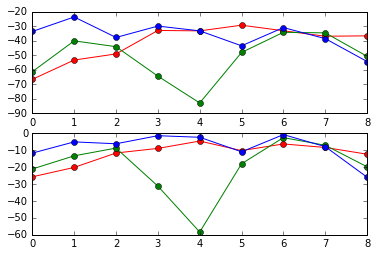

In [3]:
# Log likelihoods generated by CD interaction model, per subject
ll_interact = np.array([-66.73, -53.42, -49.2, -33., -33.29, -29.38, -33.22, -37., -36.73])
ll_interact_noD0CallandC0Dall = np.array([-25.71, -20.15, -11.62, -8.9, -4.56, -10.2, -6.27, -8.35, -12.34])
ll_interact_no90andID = np.array([-43.01, -38.58, -27.59, -27.55, -24.04, -23.16, -16.71, -29.67, -30.62])
ll_interact_no90 = np.array([-55.22, -44.45, -34.73, -26.3 , -23.65, -22.3 , -20.59, -29.94, -29.06])
ll_interact_noID = np.array([-54.71, -45.07, -33.92, -29.65, -28.86, -26.57, -28.84, -27.21, -28.14])

# Log likelihoods generated by fitting parametric coherence at each distance, per subject
ll_coh = np.array([-61.46, -40.19, -44.21, -64.53, -83.03, -48.19, -34.29, -34.68, -50.85])
ll_coh_noD0CallandC0Dall = np.array([-21.08, -13.3,   -8.71, -31.2,  -58.36, -17.99,  -2.53,  -7.06, -19.8 ])
ll_coh_no90andID = np.array([-39.61, -30.45, -31.84, -26.34, -22.35, -25.09, -23.46, -28.51, -25.43])
ll_coh_no90 = np.array([-55.08, -36.8,  -38.87, -35.18, -31.78, -35.9,  -28.01, -35.34, -37.58])
ll_coh_noID = np.array([-55.99, -39.6,  -40.68, -48.59, -63.32, -37.24, -30.41, -32.36, -54.28])

# Log likelihoods generated by fitting parametric distance at each coherence, per subject
ll_dist = np.array([-33.71, -23.7, -37.84, -30., -33.29, -43.6, -31.02, -38.66, -54.45])
ll_dist_noD0CallandC0Dall = np.array([-11.68,  -5.05,  -6.16,  -1.39,  -2.32, -10.93,  -0.74,  -7.87, -25.95])
ll_dist_no90andID = np.array([-28.68, -20.86, -24.91, -22.04, -22.95, -27.77, -23.06, -27.8,  -26.05])
ll_dist_no90 = np.array([-30.5,  -23.99, -33.32, -29.59, -31.97, -41.8,  -26.3,  -37.25, -48.99])
ll_dist_noID = np.array([-30.84, -27.28, -34.6,  -24.45, -27.01, -38.65, -30.3,  -34.74, -47.91])

plt.subplot(211)
plt.plot(ll_interact, 'ro-')
plt.plot(ll_coh, 'go-')
plt.plot(ll_dist, 'bo-')

plt.subplot(212)
plt.plot(ll_interact_noD0CallandC0Dall, 'ro-')
plt.plot(ll_coh_noD0CallandC0Dall, 'go-')
plt.plot(ll_dist_noD0CallandC0Dall, 'bo-')


# So the interaction model fits 2 subjects better and the distance model fits 3 subjects better.
# The coherence model is either similar to the interaction model or the worst.
# For 3 subjects all models perform similarly
# For 2 other subjects distance and interaction models perform similarly.

print(round(sum(ll_interact), ndigits=2), round(sum(ll_coh), ndigits=2), round(sum(ll_dist), ndigits=2))
print(round(sum(ll_interact_noD0CallandC0Dall), ndigits=2), round(sum(ll_coh_noD0CallandC0Dall), ndigits=2), \
      round(sum(ll_dist_noD0CallandC0Dall), ndigits=2))
print(round(sum(ll_interact_no90andID), ndigits=2), round(sum(ll_coh_no90andID), ndigits=2), \
      round(sum(ll_dist_no90andID), ndigits=2))
print(round(sum(ll_interact_no90), ndigits=2), round(sum(ll_coh_no90), ndigits=2), \
      round(sum(ll_dist_no90), ndigits=2))
print(round(sum(ll_interact_noID), ndigits=2), round(sum(ll_coh_noID), ndigits=2), \
      round(sum(ll_dist_noID), ndigits=2))

In [5]:
# Find the AIC values for the 2 models:
# 1) Interaction model
# 2) Model fitting parametric coherences at all distances
# 3) Model fitting parametric distances at all coherences

# The formula is:
# AIC = 2k - 2ln(L) where
# k = number of estimated parameters in model
# L = maximum likelihood for the model 

# The preferred model is the one with the lowest AIC value 

# Practical considerations:
# The interaction model has 23 parameter estimates (20 x values + 1 each A, k, tR values) per subject
# The maximum log-likelihood is given by ll_interact
# The parametric coherence fitting model has 19 parameter estimates (4 coherences, 5 each A, k, tR values) per subject
# The maximum log-likelihood is given by ll_coh
# The parametric distance fitting model has 17 parameter estimates (5 distances, 4 each A, k, tR values) per subject
# The maximum log-likelihood is given by ll_dist

nSub = 9

AIC_interact = np.zeros(nSub)
AIC_coh = np.zeros(nSub)
AIC_dist = np.zeros(nSub)
k_interact = 23
k_coh = 19
k_dist = 17

AIC_interact = 2 * k_interact - 2 * ll_interact
AIC_coh = 2 * k_coh - 2 * ll_coh
AIC_dist = 2 * k_dist - 2 * ll_dist

AIC_interact_noD0CallandC0Dall = np.zeros(nSub)
AIC_coh_noD0CallandC0Dall = np.zeros(nSub)
AIC_dist_noD0CallandC0Dall = np.zeros(nSub)
k_interact_noD0CallandC0Dall = 15
k_coh_noD0CallandC0Dall = 15
k_dist_noD0CallandC0Dall = 13

AIC_interact_noD0CallandC0Dall = 2 * k_interact_noD0CallandC0Dall - 2 * ll_interact_noD0CallandC0Dall
AIC_coh_noD0CallandC0Dall = 2 * k_coh_noD0CallandC0Dall - 2 * ll_coh_noD0CallandC0Dall
AIC_dist_noD0CallandC0Dall = 2 * k_dist_noD0CallandC0Dall - 2 * ll_dist_noD0CallandC0Dall

AIC_interact_no90andID = np.zeros(nSub)
AIC_coh_no90andID = np.zeros(nSub)
AIC_dist_no90andID = np.zeros(nSub)
k_interact_no90andID = 15
k_coh_no90andID = 13
k_dist_no90andID = 15

AIC_interact_no90andID = 2 * k_interact_no90andID - 2 * ll_interact_no90andID
AIC_coh_no90andID = 2 * k_coh_no90andID - 2 * ll_coh_no90andID
AIC_dist_no90andID = 2 * k_dist_no90andID - 2 * ll_dist_no90andID

AIC_interact_no90 = np.zeros(nSub)
AIC_coh_no90 = np.zeros(nSub)
AIC_dist_no90 = np.zeros(nSub)
k_interact_no90 = 19
k_coh_no90 = 16
k_dist_no90 = 16

AIC_interact_no90 = 2 * k_interact_no90 - 2 * ll_interact_no90
AIC_coh_no90 = 2 * k_coh_no90 - 2 * ll_coh_no90
AIC_dist_no90 = 2 * k_dist_no90 - 2 * ll_dist_no90

AIC_interact_noID = np.zeros(nSub)
AIC_coh_noID = np.zeros(nSub)
AIC_dist_noID = np.zeros(nSub)
k_interact_noID = 19
k_coh_noID = 16
k_dist_noID = 16

AIC_interact_noID = 2 * k_interact_noID - 2 * ll_interact_noID
AIC_coh_noID = 2 * k_coh_noID - 2 * ll_coh_noID
AIC_dist_noID = 2 * k_dist_noID - 2 * ll_dist_noID

In [6]:
np.set_printoptions(precision = 3, suppress = True)
print('AIC interaction: ')
print(AIC_interact)
print('AIC coherence: ')
print(AIC_coh)
print('AIC distance: ')
print(AIC_dist)
print('Total AICs: ')
print(round(sum(AIC_interact), ndigits = 2), round(sum(AIC_coh), ndigits = 2), round(sum(AIC_dist), ndigits = 2))
print('')
# For 2 subjects, the interaction model performs better than the coherence or distance models
# For all subjects, the distance model performs better than the coherence model

print('AICs without the D0Call and C0Dall conditions')
print('AIC interaction: ')
print(AIC_interact_noD0CallandC0Dall)
print('AIC coherence: ')
print(AIC_coh_noD0CallandC0Dall)
print('AIC distance: ')
print(AIC_dist_noD0CallandC0Dall)
print('Total AICs: ')
print(round(sum(AIC_interact_noD0CallandC0Dall), ndigits = 2), round(sum(AIC_coh_noD0CallandC0Dall), ndigits = 2), \
      round(sum(AIC_dist_noD0CallandC0Dall), ndigits = 2))
print('')

print('AICs without the D90Call and D(90-ID)Call conditions')
print('AIC interaction: ')
print(AIC_interact_no90andID)
print('AIC coherence: ')
print(AIC_coh_no90andID)
print('AIC distance: ')
print(AIC_dist_no90andID)
print('Total AICs: ')
print(round(sum(AIC_interact_no90andID), ndigits = 2), round(sum(AIC_coh_no90andID), ndigits = 2), \
      round(sum(AIC_dist_no90andID), ndigits = 2))
print('')

print('AICs without the D90Call condition')
print('AIC interaction: ')
print(AIC_interact_no90)
print('AIC coherence: ')
print(AIC_coh_no90)
print('AIC distance: ')
print(AIC_dist_no90)
print('Total AICs: ')
print(round(sum(AIC_interact_no90), ndigits = 2), round(sum(AIC_coh_no90), ndigits = 2), \
      round(sum(AIC_dist_no90), ndigits = 2))
print('')

print('AICs without the D(90-ID)Call condition')
print('AIC interaction: ')
print(AIC_interact_noID)
print('AIC coherence: ')
print(AIC_coh_noID)
print('AIC distance: ')
print(AIC_dist_noID)
print('Total AICs: ')
print(round(sum(AIC_interact_noID), ndigits = 2), round(sum(AIC_coh_noID), ndigits = 2), \
      round(sum(AIC_dist_noID), ndigits = 2))

AIC interaction: 
[ 179.46  152.84  144.4   112.    112.58  104.76  112.44  120.    119.46]
AIC coherence: 
[ 160.92  118.38  126.42  167.06  204.06  134.38  106.58  107.36  139.7 ]
AIC distance: 
[ 101.42   81.4   109.68   94.    100.58  121.2    96.04  111.32  142.9 ]
Total AICs: 
1157.94 1264.86 958.54

AICs without the D0Call and C0Dall conditions
AIC interaction: 
[ 81.42  70.3   53.24  47.8   39.12  50.4   42.54  46.7   54.68]
AIC coherence: 
[  72.16   56.6    47.42   92.4   146.72   65.98   35.06   44.12   69.6 ]
AIC distance: 
[ 49.36  36.1   38.32  28.78  30.64  47.86  27.48  41.74  77.9 ]
Total AICs: 
486.2 630.06 378.18

AICs without the D90Call and D(90-ID)Call conditions
AIC interaction: 
[ 116.02  107.16   85.18   85.1    78.08   76.32   63.42   89.34   91.24]
AIC coherence: 
[ 105.22   86.9    89.68   78.68   70.7    76.18   72.92   83.02   76.86]
AIC distance: 
[ 87.36  71.72  79.82  74.08  75.9   85.54  76.12  85.6   82.1 ]
Total AICs: 
791.86 740.16 718.24

AICs with

In [11]:
# Calculate corrected AIC (AICc) values
# AICc = AIC + (2*(k+1)*(k+2))/(n-k-2)
n_interact = 20 * 2
n_coh = 20 * 2
n_dist = 20 * 2
n_interact_noD0CallandC0Dall = 12 * 2
n_coh_noD0CallandC0Dall = 12 * 2
n_dist_noD0CallandC0Dall = 12 * 2
n_interact_no90andID = 12 * 2
n_coh_no90andID = 12 * 2
n_dist_no90andID = 12 * 2
n_interact_no90 = 16 * 2
n_coh_no90 = 16 * 2
n_dist_no90 = 16 * 2
n_interact_noID = 16 * 2
n_coh_noID = 16 * 2
n_dist_noID = 16 * 2

AICc_interact = AIC_interact + (2*(k_interact+1)*(k_interact+2))/(n_interact-k_interact-2)
AICc_coh = AIC_coh + (2*(k_coh+1)*(k_coh+2))/(n_coh-k_coh-2)
AICc_dist = AIC_dist + (2*(k_dist+1)*(k_dist+2))/(n_dist-k_dist-2)
AICc_interact_noD0CallandC0Dall = AIC_interact_noD0CallandC0Dall + (2*(k_interact_noD0CallandC0Dall+1)*(k_interact_noD0CallandC0Dall+2))/(n_interact_noD0CallandC0Dall-k_interact_noD0CallandC0Dall-2)
AICc_coh_noD0CallandC0Dall = AIC_coh_noD0CallandC0Dall + (2*(k_coh_noD0CallandC0Dall+1)*(k_coh_noD0CallandC0Dall+2))/(n_coh_noD0CallandC0Dall-k_coh_noD0CallandC0Dall-2)
AICc_dist_noD0CallandC0Dall = AIC_dist_noD0CallandC0Dall + (2*(k_dist_noD0CallandC0Dall+1)*(k_dist_noD0CallandC0Dall+2))/(n_dist_noD0CallandC0Dall-k_dist_noD0CallandC0Dall-2)
AICc_interact_no90andID = AIC_interact_no90andID + (2*(k_interact_no90andID+1)*(k_interact_no90andID+2))/(n_interact_no90andID-k_interact_no90andID-2)
AICc_coh_no90andID = AIC_coh_no90andID + (2*(k_coh_no90andID+1)*(k_coh_no90andID+2))/(n_coh_no90andID-k_coh_no90andID-2)
AICc_dist_no90andID = AIC_dist_no90andID + (2*(k_dist_no90andID+1)*(k_dist_no90andID+2))/(n_dist_no90andID-k_dist_no90andID-2)
AICc_interact_no90 = AIC_interact_no90 + (2*(k_interact_no90+1)*(k_interact_no90+2))/(n_interact_no90-k_interact_no90-2)
AICc_coh_no90 = AIC_coh_no90 + (2*(k_coh_no90+1)*(k_coh_no90+2))/(n_coh_no90-k_coh_no90-2)
AICc_dist_no90 = AIC_dist_no90 + (2*(k_dist_no90+1)*(k_dist_no90+2))/(n_dist_no90-k_dist_no90-2)
AICc_interact_noID = AIC_interact_noID + (2*(k_interact_noID+1)*(k_interact_noID+2))/(n_interact_noID-k_interact_noID-2)
AICc_coh_noID = AIC_coh_noID + (2*(k_coh_noID+1)*(k_coh_noID+2))/(n_coh_noID-k_coh_noID-2)
AICc_dist_noID = AIC_dist_noID + (2*(k_dist_noID+1)*(k_dist_noID+2))/(n_dist_noID-k_dist_noID-2)

In [12]:
np.set_printoptions(precision = 3, suppress = True)
print('AICc interaction: ')
print(AICc_interact)
print('AICc coherence: ')
print(AICc_coh)
print('AICc distance: ')
print(AICc_dist)
print('Total AICcs: ')
print(round(sum(AICc_interact), ndigits = 2), round(sum(AICc_coh), ndigits = 2), round(sum(AICc_dist), ndigits = 2))
print('')
# For 2 subjects, the interaction model performs better than the coherence or distance models
# For all subjects, the distance model performs better than the coherence model

print('AICcs without the D0Call and C0Dall conditions')
print('AICc interaction: ')
print(AICc_interact_noD0CallandC0Dall)
print('AICc coherence: ')
print(AICc_coh_noD0CallandC0Dall)
print('AICc distance: ')
print(AICc_dist_noD0CallandC0Dall)
print('Total AICcs: ')
print(round(sum(AICc_interact_noD0CallandC0Dall), ndigits = 2), round(sum(AICc_coh_noD0CallandC0Dall), ndigits = 2), \
      round(sum(AICc_dist_noD0CallandC0Dall), ndigits = 2))
print('')

print('AICcs without the D90Call and D(90-ID)Call conditions')
print('AICc interaction: ')
print(AICc_interact_no90andID)
print('AICc coherence: ')
print(AICc_coh_no90andID)
print('AICc distance: ')
print(AICc_dist_no90andID)
print('Total AICcs: ')
print(round(sum(AICc_interact_no90andID), ndigits = 2), round(sum(AICc_coh_no90andID), ndigits = 2), \
      round(sum(AICc_dist_no90andID), ndigits = 2))
print('')

print('AICcs without the D90Call condition')
print('AICc interaction: ')
print(AICc_interact_no90)
print('AICc coherence: ')
print(AICc_coh_no90)
print('AICc distance: ')
print(AICc_dist_no90)
print('Total AICcs: ')
print(round(sum(AICc_interact_no90), ndigits = 2), round(sum(AICc_coh_no90), ndigits = 2), \
      round(sum(AICc_dist_no90), ndigits = 2))
print('')

print('AICcs without the D(90-ID)Call condition')
print('AICc interaction: ')
print(AICc_interact_noID)
print('AICc coherence: ')
print(AICc_coh_noID)
print('AICc distance: ')
print(AICc_dist_noID)
print('Total AICcs: ')
print(round(sum(AICc_interact_noID), ndigits = 2), round(sum(AICc_coh_noID), ndigits = 2), \
      round(sum(AICc_dist_noID), ndigits = 2))

AICc interaction: 
[ 259.46  232.84  224.4   192.    192.58  184.76  192.44  200.    199.46]
AICc coherence: 
[ 205.131  162.591  170.631  211.271  248.271  178.591  150.791  151.571
  183.911]
AICc distance: 
[ 133.991  113.971  142.251  126.571  133.151  153.771  128.611  143.891
  175.471]
Total AICcs: 
1877.94 1662.75 1251.68

AICcs without the D0Call and C0Dall conditions
AICc interaction: 
[ 159.134  148.014  130.954  125.514  116.834  128.114  120.254  124.414
  132.394]
AICc coherence: 
[ 149.874  134.314  125.134  170.114  224.434  143.694  112.774  121.834
  147.314]
AICc distance: 
[  96.027   82.767   84.987   75.447   77.307   94.527   74.147   88.407
  124.567]
Total AICcs: 
1185.63 1329.49 798.18

AICcs without the D90Call and D(90-ID)Call conditions
AICc interaction: 
[ 193.734  184.874  162.894  162.814  155.794  154.034  141.134  167.054
  168.954]
AICc coherence: 
[ 151.887  133.567  136.347  125.347  117.367  122.847  119.587  129.687
  123.527]
AICc distance: 
[ 16

In [ ]:
# Calculate AICc weights
# wi = exp(-di/2) / sigma_1_to_R(exp(-dr/2)), where
# di = difference between weights of current model and best model
# sigma_1_to_R is summation from r = 1 to r = R, where R = # models